### Importing the necessary libraries -

In [301]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_auc_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()
sns.set_style("white")
%matplotlib inline
rcParams['figure.figsize'] = [20,10]

### Loading the dataset -

In [245]:
df = pd.read_csv(r'datasets/viva_credit.csv')

In [246]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Information about the dataset attributes and memory usage -

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Statistical description -

In [248]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#### No. of Unique Values in each column -

In [249]:
unique_values = df.nunique()
display(unique_values.sort_values(ascending=False).to_frame(name='Unique Values'))

,Unique Values
ID,30000
BILL_AMT1,22723
BILL_AMT2,22346
BILL_AMT3,22026
BILL_AMT4,21548
BILL_AMT5,21010
BILL_AMT6,20604
PAY_AMT1,7943
PAY_AMT2,7899
PAY_AMT3,7518


### Dimensions of the data -

In [250]:
print((df.shape),'\n')
print("Shape of viva_credit.csv: ", df.shape)

(30000, 25) 

Shape of viva_credit.csv:  (30000, 25)


In [251]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [252]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
	df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# EDA -

## Data Cleaning -
### a. Check for Missing Values
### b. Handle Missing Values
### c. Remove Duplicates

In [253]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [254]:
types = df.dtypes
display(types.to_frame(name='Data Types'))

,Data Types
ID,int64
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


### Checking for duplicate rows -

In [255]:
duplicates = df[df.duplicated()]

In [256]:
duplicates

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [257]:
df = df.drop_duplicates()

### Univariate Analysis -

In [258]:
types = df.dtypes
display(types.to_frame(name='Data Types'))

,Data Types
ID,int64
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


### Checking for outliers -

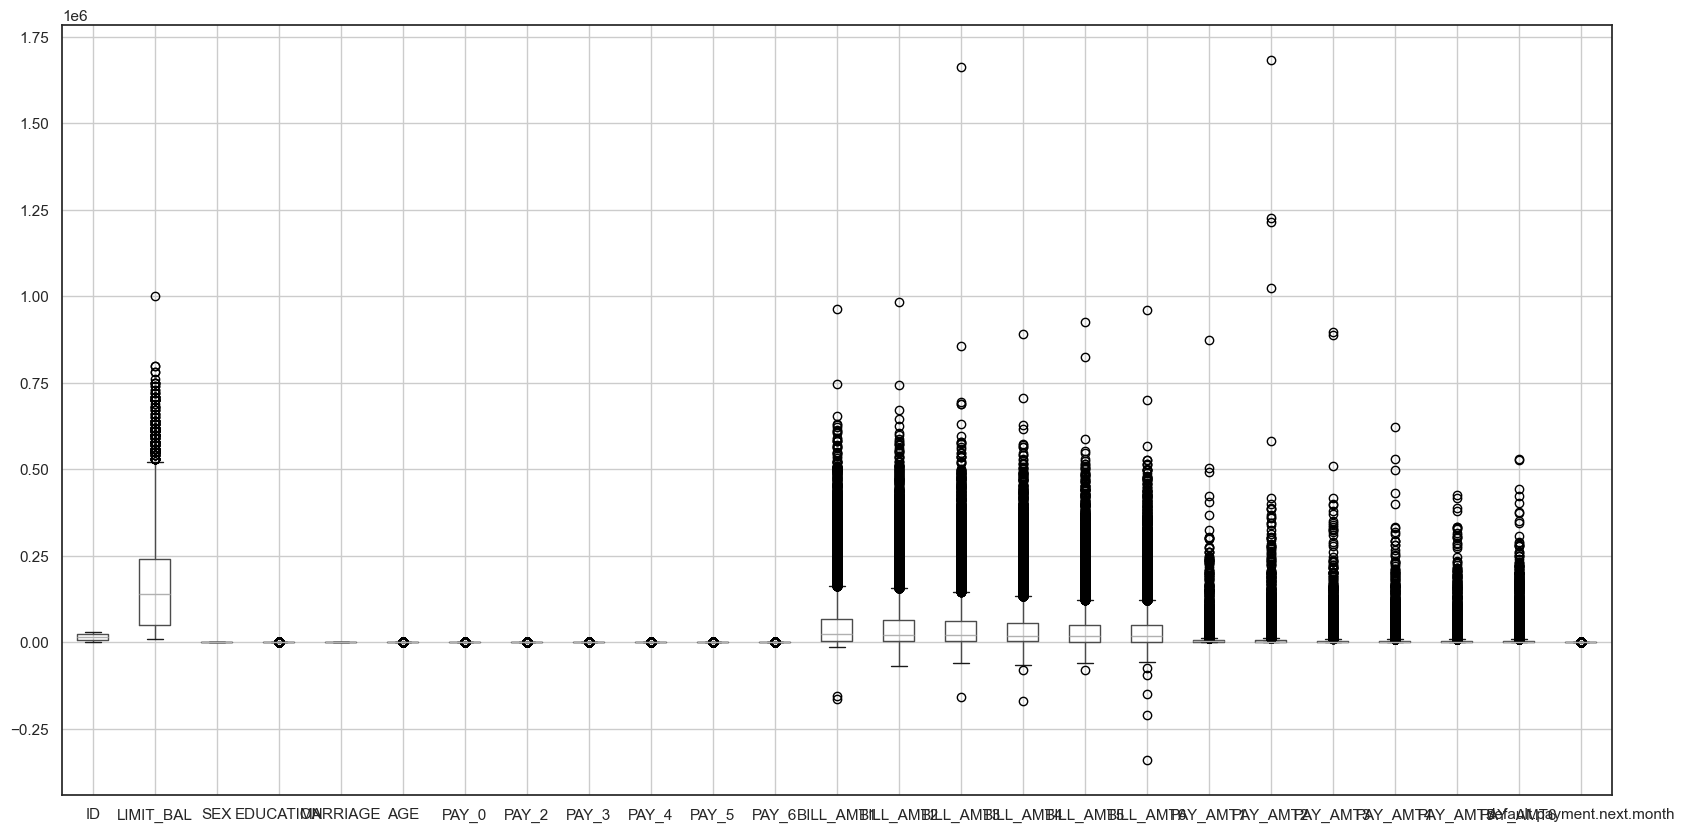

In [259]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

### 📊 Outlier Removal Using IQR

We remove outliers from delay-related columns using the IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR).

In [282]:
# # Remove outliers using IQR
outlier_col = [
    "LIMIT_BAL",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

for col in outlier_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Apply to selected numerical columns
num_cols = [col for col in df.columns if 'LIMIT_BAL' in col 
            or 'BILL_AMT' in col or 'PAY_AMT' in col]

for col in num_cols:
    cap_outliers(df, col)

In [283]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
18,19,360000.0,2,1,1,49,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,20,180000.0,2,1,2,29,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29982,29983,90000.0,1,2,1,36,0,0,0,0,...,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1
29985,29986,240000.0,1,1,2,30,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29986,29987,360000.0,1,1,2,35,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29992,29993,10000.0,1,3,1,43,0,0,0,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0


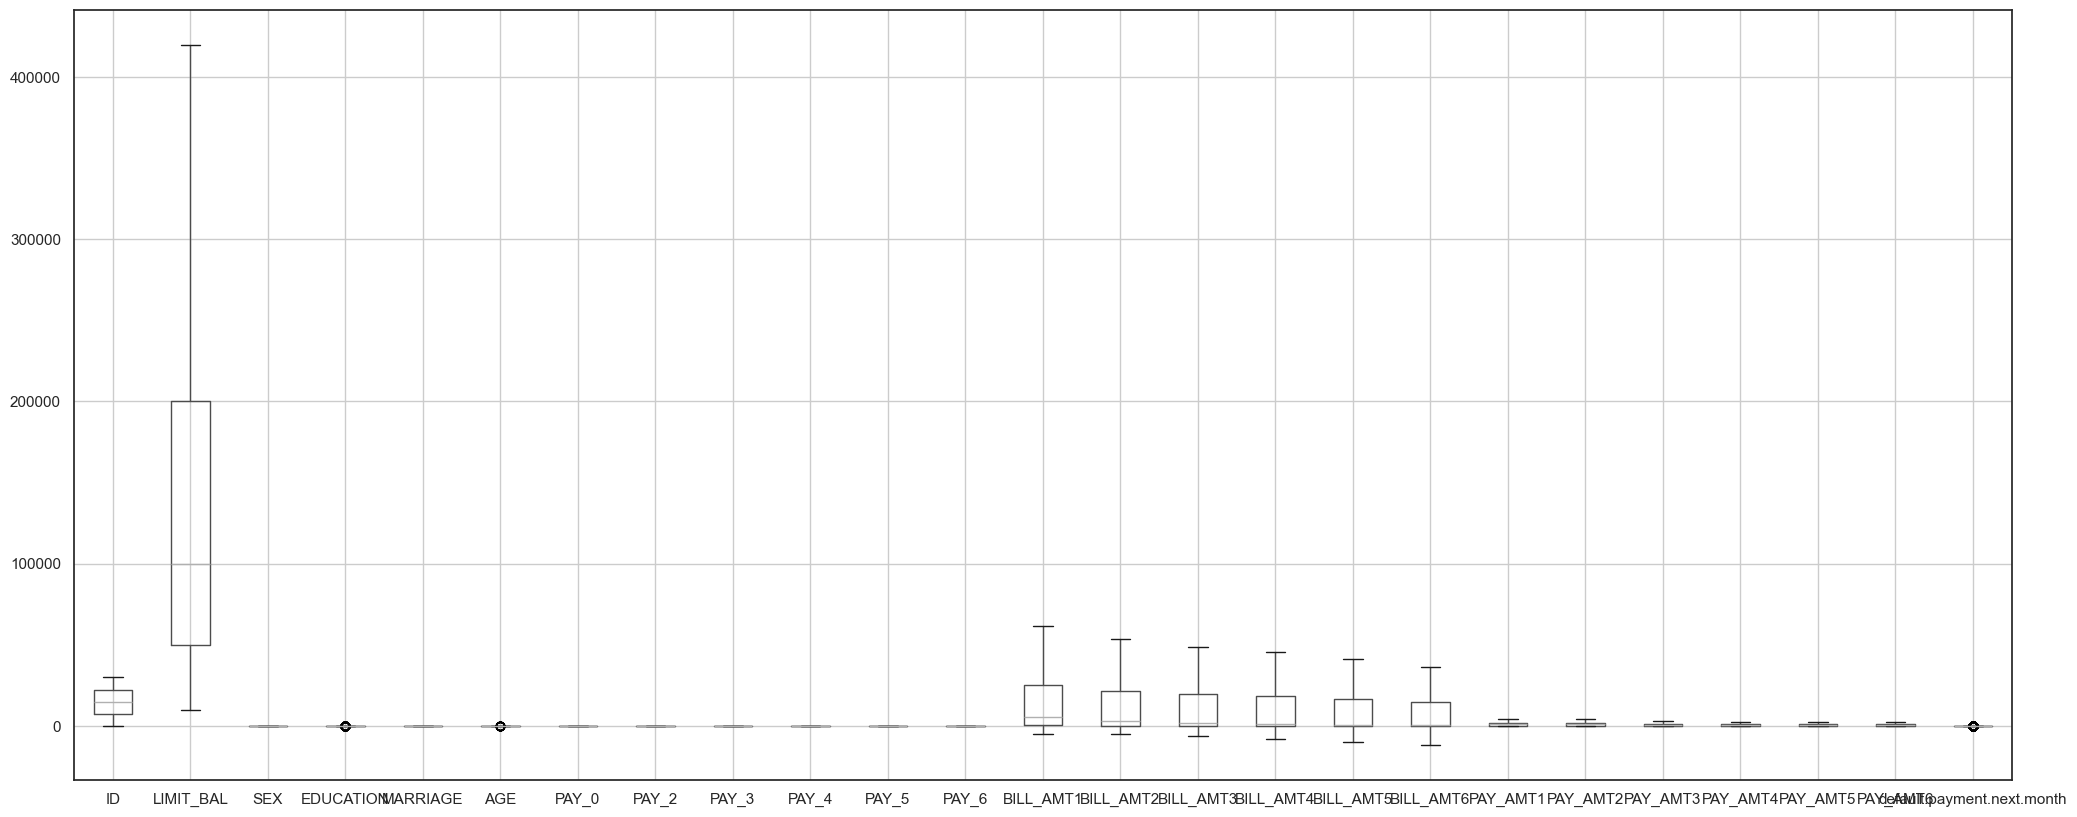

In [284]:
plt.figure(figsize=(25,10))
df.boxplot()
plt.show()

### Multi - Variate Analysis -

#### Correlation Matrix -

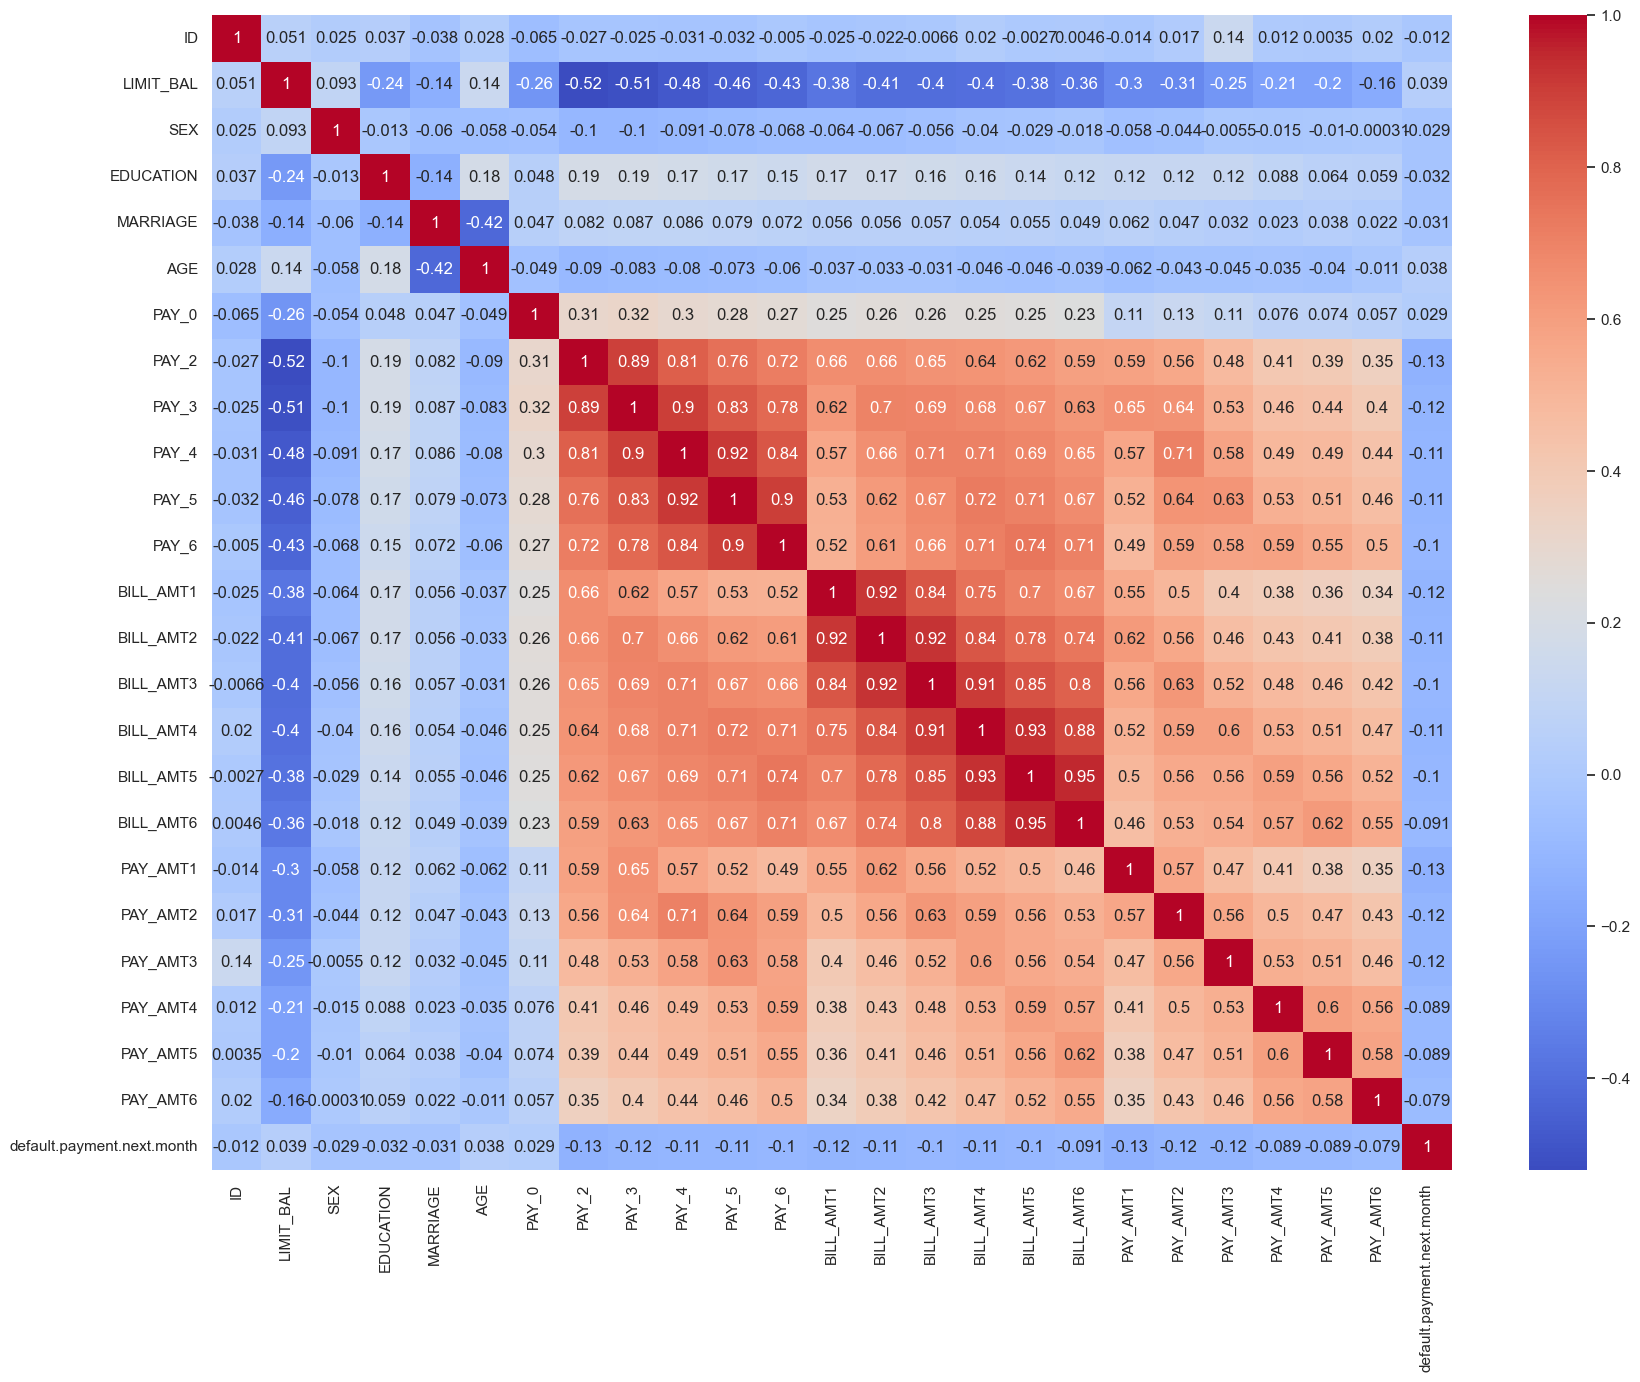

In [285]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True)
plt.show()

## Insights -
- Strong positive correlation observed among `BILL_AMT` and `PAY_AMT` features, indicating consistent repayment behavior across months.
- `PAY_0` to `PAY_6` are highly correlated with each other and with `default.payment.next.month`, suggesting past payment delays are strong indicators of default.
- `LIMIT_BAL` shows a weak negative correlation with default, implying higher limits may slightly reduce default risk.
- Demographic features like `SEX`, `EDUCATION`, `MARRIAGE`, and `AGE` have low correlation with default, indicating limited predictive power alone.

## Descriptive Statistics -
### What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [286]:
mean = df['AGE'].sum()/df.shape[0]
mean

np.float64(35.39557251908397)

In [287]:
median = df['AGE'].median()
median

34.0

In [288]:
std = df['AGE'].std()
std

9.558589424783326

### Checking the distribution of target variable -

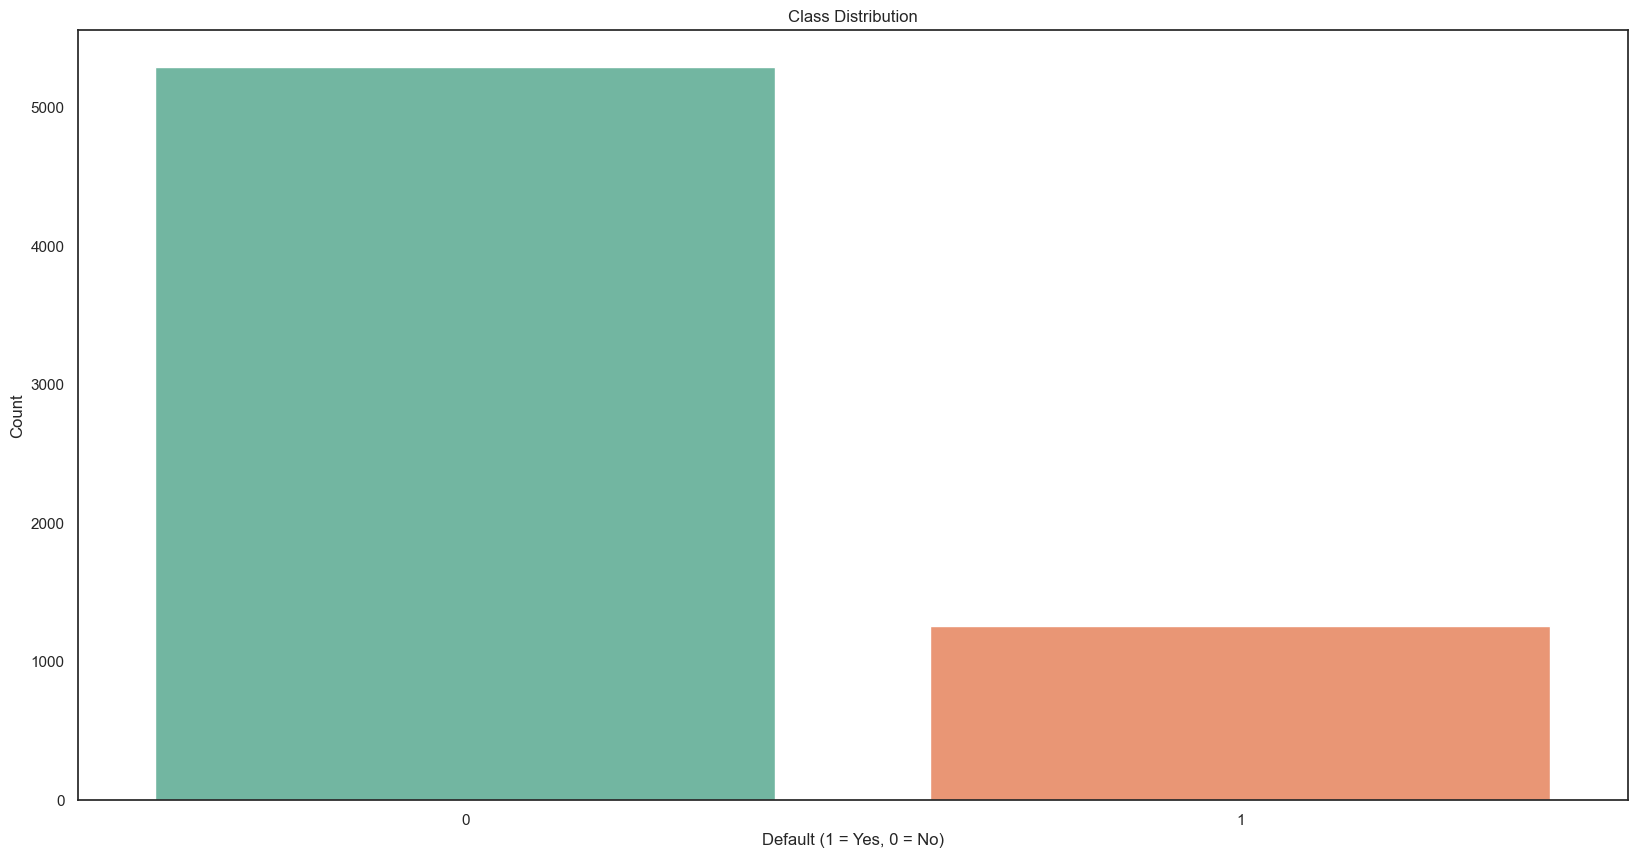

In [289]:
sns.countplot(x='default.payment.next.month', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Splitting the dataset -

### Creating the Features and Target Variable -

In [290]:
X = df.drop('default.payment.next.month', axis = 1)
y = df['default.payment.next.month']

In [291]:
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
3,4,50000.0,2,2,1,37,0,0,0,0,...,48345.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,6,50000.0,1,1,2,37,0,0,0,0,...,48345.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
18,19,360000.0,2,1,1,49,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,20,180000.0,2,1,2,29,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
y.head()

3     0
5     0
7     0
18    0
19    0
Name: default.payment.next.month, dtype: int64

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training a Linear Regressor -

In [294]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [295]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# Evaluating the model on the test data -

In [296]:
y_pred = model.predict(X_test)

### 1. Accuracy Test -

In [297]:
accuracy_score(y_test, y_pred)

0.608058608058608

### 2. Confusion Matrix -

In [298]:
confusion_matrix(y_test, y_pred)

array([[819, 506],
       [136, 177]])

#### 3. Classification Report -

In [302]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72      1325
           1       0.26      0.57      0.36       313

    accuracy                           0.61      1638
   macro avg       0.56      0.59      0.54      1638
weighted avg       0.74      0.61      0.65      1638



#### 4. ROC - AUC Score -

In [303]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

ROC-AUC Score: 0.5918042076074508


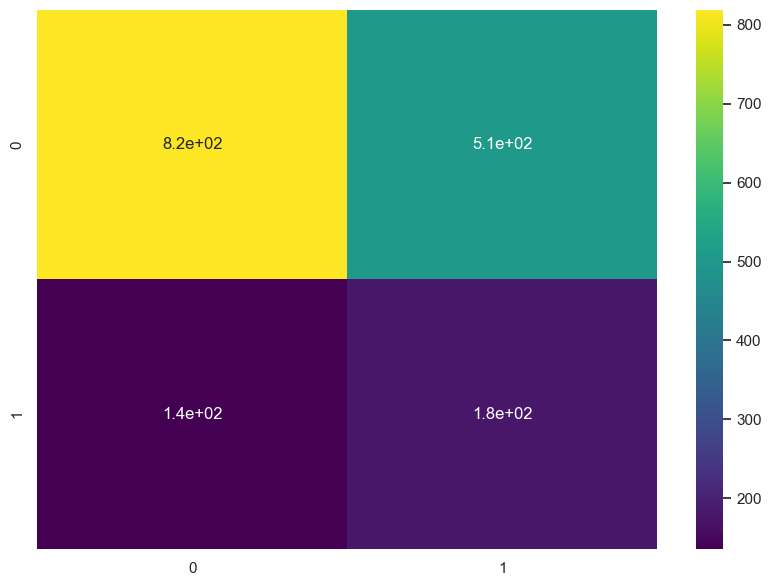

In [304]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'viridis')
plt.show()